# MULTI-CLASS CLASSIFICATION OF TWEETS
## CETM47 - Machine Learning and Data Analytics
### This Notebook file contains the Data Processing phase and the various experiments carried out during the process of performing a Multi-class Classification of Tweets using CRISP-DM methodology as expected of me for the completion my assessment.
The Project is credited to:
* Okeoma O. Ihunwo
* Student No.: 229154449
* Course: MSc Applied Data Science
* School of Computer Science
* University of Sunderland
**(2022/3 - Sunderland - ASUND)**

# Business Understanding: 
- **Objective**: A Multi-class Classification of Tweets using Machine Learning to compare models with the main goal of selecting the most optimum results
- **Requirements**: Resources include Jupyter notebook, Python 3 series, nltk, sklearn, pandas, matplotlib and other NLP machine learning and visualization library installations.
- **Main Technology apllied**: Cross-validation (K-Fold) for dividing the dataset into k subsets and repeating iteratively, k times so that at each iteration, a different subset is used as the holdout set meant for testing and Grid-search for searching all parameter combinations in a given grid to determine the best model. 
- **Constraints**: Because the task is to perform experiments to get the optimum evaluation results, the deployment phase of the CRISP-DM methodology will not be included in this project.

In [71]:
# Importation of libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np
from sklearn.model_selection import train_test_split
import json
import time

# Define a stopwords variable that reads from the stopwords object
stopwords = set(stopwords.words("english"))

# Ignore warning messages
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Download additional NLTK libraries, if not alraedy downloaded

# Download wordnet if not already downloaded
nltk.download('wordnet')

# Download Punkt Sentence Tokenizer if not already downloaded
nltk.download('punkt')

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Understanding:
In this phase, data sources and data quality are assessed, and data is explored to identify patterns and characteristics.

## Data Exploration

In [3]:
#Explore data using loads method from json library to identify patterns and characteristics
data_json = json.loads(open('CETM47-22_23-AS2-Data.json').read())

# Print the first 10 records of the tweets_data
data_json[0:10]

[{'text': 'The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516324419866624,
  'label_name': 'sports_&_gaming'},
 {'text': 'I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516440690176006,
  'label_name': 'sports_&_gaming'},
 {'text': 'Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets in October ',
  'date': '2019-09-08',
  'label': 4,
  'id': 1170516543387709440,
  'label_name': 'sports_&_gaming'},
 {'text': 'A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn’t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , 

We could see that the dataset contains some impurities that can cause the models not to claassify the categories properly. some of them are; {{USERNAME}}, {{URL}}, {@mentions@}, #, stopwords and punctuations. We will definitely do some cleaning.

In [4]:
# Read-in the dataset and convert to pandas dataframe
df = pd.read_json("CETM47-22_23-AS2-Data.json")
# Display the first five records
df.head()

,text,date,label,id,label_name
0,The {@Clinton LumberKings@} beat the {@Cedar R...,2019-09-08,4,1170516324419866624,sports_&_gaming
1,I would rather hear Eli Gold announce this Aub...,2019-09-08,4,1170516440690176006,sports_&_gaming
2,"Someone take my phone away, I’m trying to not ...",2019-09-08,4,1170516543387709440,sports_&_gaming
3,"A year ago, Louisville struggled to beat an FC...",2019-09-08,4,1170516620466429953,sports_&_gaming
4,Anyone know why the #Dodgers #Orioles game nex...,2019-09-08,4,1170516711411310592,sports_&_gaming


In [5]:
# Check the number of rows in the dataset
print(f"Number of rows in the dataset is {len(df.index)}")

Number of rows in the dataset is 6443


In [6]:
# Check the shape and details of the dataset
print(df.shape)
print(df.info())

(6443, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        6443 non-null   object        
 1   date        6443 non-null   datetime64[ns]
 2   label       6443 non-null   int64         
 3   id          6443 non-null   int64         
 4   label_name  6443 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 251.8+ KB
None


From the above information, we could see that there are 5 columns (text, date, label, id and label_name). There are also no missing numbers in the dataset which is ideal for machine learning. We can confirm this from the code below:

In [7]:
# Check for missing values
# How much missing data is in the dataset?
print("Number of missing values in text: {}".format(df['text'].isnull().sum()))
print("Number of missing values in date: {}".format(df['date'].isnull().sum()))
print("Number of missing values in label: {}".format(df['label'].isnull().sum()))
print("Number of missing values in date: {}".format(df['id'].isnull().sum()))
print("Number of missing values in text: {}".format(df['label_name'].isnull().sum()))

Number of missing values in text: 0
Number of missing values in date: 0
Number of missing values in label: 0
Number of missing values in date: 0
Number of missing values in text: 0


The outcome variable is the label column; therefore we will look into the column to see if we can find interesting patterns

In [8]:
# Sort the dataset on the label column in ascending order
df_sorted = df.sort_values("label")
# display the first five records
df_sorted.head()

,text,date,label,id,label_name
2563,Happy National Ice Cream Day! Celebrated by go...,2020-07-19,0,1284998884326924290,arts_&_culture
4371,The truth is the love is real..Even if everyon...,2021-08-29,0,1432100468256387075,arts_&_culture
5257,“This book provides the perfect quick read…” D...,2020-12-21,0,1341111023722348545,arts_&_culture
6280,#GodMorningSunday #सत_भक्ति_सन्देश There is ev...,2021-07-25,0,1419143006834159618,arts_&_culture
5675,Happy Persian New Year! {{URL}} via {@CNN Trav...,2021-03-21,0,1373450772357160965,arts_&_culture


From the last cell ran, there is a portion that contains a hastag (#सत_भक्ति_सन्देश) that is in a different scripting language (devanagari) at row no.6280. We will remove it in the cause of cleaning the dataset.

In [9]:
# Retrieve unique classes from label
label_classname = df_sorted['label_name'].unique()
label_classno = df_sorted['label'].unique()
print(f"Names of classes: {label_classname}")
print()
print(f"Number of classes: {label_classno}")

Names of classes: ['arts_&_culture' 'business_&_entrepreneurs' 'pop_culture' 'daily_life'
 'sports_&_gaming' 'science_&_technology']

Number of classes: [0 1 2 3 4 5]


In [10]:
df_sorted['label_name'].unique()

array(['arts_&_culture', 'business_&_entrepreneurs', 'pop_culture',
       'daily_life', 'sports_&_gaming', 'science_&_technology'],
      dtype=object)

In [11]:
df_sorted['label'].unique()

array([0, 1, 2, 3, 4, 5], dtype=int64)

To make the outcome variable distribution clearer, we apply some visualization techniques.

### Data Visualization

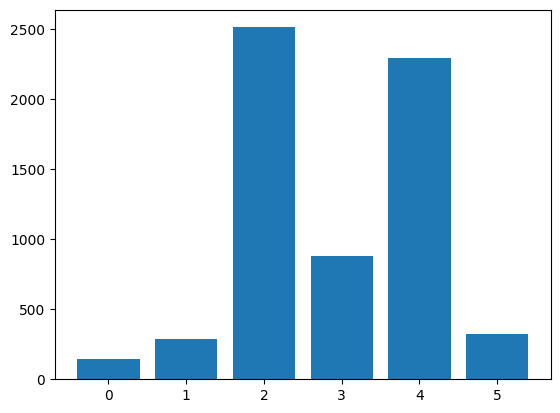

In [13]:
# Check the distribution of the classes in the label
import matplotlib.pyplot as plt
classes = label_classno
total_val=[]
for num in classes:
    count = len(df[df.label == num])
    total_val.append(count)
plt.bar([0,1,2,3,4,5], total_val)
plt.show()

In [14]:
group_by_Type = df_sorted.groupby(by=['label_name'])
label_count = group_by_Type.count()
# Pie Chart for Displaying the Sporty engine sizes count (popularity)
label_count_type = pd.DataFrame(label_count.iloc[:,1])
label_count_type.rename(columns={'date': 'label_count'}, inplace=True)
label_count_type

,label_count
label_name,
arts_&_culture,144
business_&_entrepreneurs,287
daily_life,883
pop_culture,2512
science_&_technology,326
sports_&_gaming,2291


array([<Axes: ylabel='label_count'>], dtype=object)

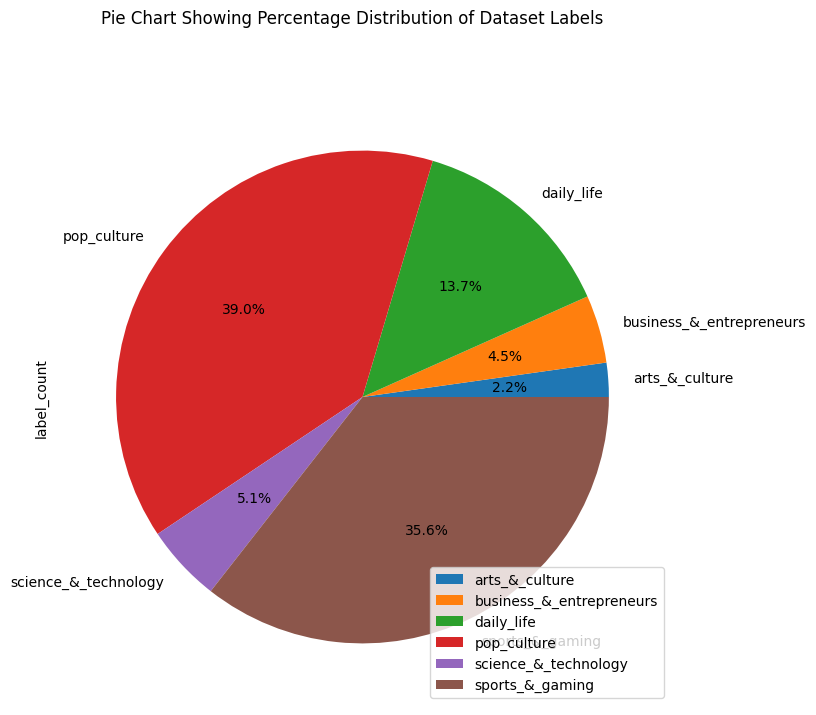

In [15]:
# Pie Chart displaying the label sizes count (quantity)
label_count_type.plot.pie(subplots=True, title='Pie Chart Showing Percentage Distribution of Dataset Labels', autopct='%1.1f%%', figsize=(8, 8))

### The above bar and pie charts show clearly the distribution of label sizes in the dataset. The smallest label size is 'arts_&_culture' with 2.2 percentage value while the largest label size is pop_culture with 39.0 percentage value. With the wide difference between these categories, there must be in place a strategy that enforces the equal distribution (uniformity) of each category in the splitting of the dataset during machine learning.

## Data Processing
This phase involves cleaning, transforming, and preprocessing data to prepare it for analysis.

In [16]:
# Drop columns that are not relevant for machine learning
# Copy original dataset to df_tweets 
df_tweets = df.copy()
df_tweets = df_tweets.drop(['date', 'id', 'label_name' ], axis=1)
df_tweets.head()

,text,label
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4
1,I would rather hear Eli Gold announce this Aub...,4
2,"Someone take my phone away, I’m trying to not ...",4
3,"A year ago, Louisville struggled to beat an FC...",4
4,Anyone know why the #Dodgers #Orioles game nex...,4


### Data Processing usually consist of 2 steps: Data Cleaning and Data Pre-processing.
### Data Cleaning
Cleaning up the data is necessary to highlight attributes that are not wanted so that the machine learning system will not pick them. Cleaning the data typically consists of a number of steps:
1. **Remove improper words and characters**
2. **Remove punctuation**
3. **Tokenization**
4. **Remove stopwords**
### Data Preprocessing
Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. Most popular ones are:
- **Lemmatization/Stematization**

## Data Cleaning

In [17]:
# Initialize stopwords object from nltk library
stopwords = nltk.corpus.stopwords.words('english') 

# Function to remove unnecessary words and #
def remove_improper_words(text):
    # Remove USERNAME, URL, and mentions but leave hashtags (May contain vital information)     
    no_improper = re.sub(r'\{\{USERNAME\}\}|\{\{URL\}\}|\{\@[^\{\}]+\@\}', '', text, flags=re.MULTILINE)
    return no_improper

# Function to remove devanagari script
def remove_devanagari(text):
    # Define the regex pattern to match Devanagari script characters
    pattern = re.compile(r'[\u0900-\u097F]+')
    
    # Use the pattern to find and remove Devanagari script characters from the text
    no_improper = pattern.sub('', text)
    
    return no_improper
    
# Function to remove all punctualtion 
def remove_punct(text):
    no_punct = "".join([char for char in text if char not in string.punctuation])
    return no_punct

# Function to tokenize each row in the dataset 
def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

# Function to remove stop words
def remove_stopwords(tokenized_list):
    cleaned_text = [word for word in tokenized_list if word not in stopwords]
    return cleaned_text

In [18]:
# Applying all cleaning steps above in order
data = df_tweets.copy()

# Remove improper words like {{USERNAME}}, {{URL}} and special characters like @ and #
data['no_improper'] = data['text'].apply(lambda x: remove_improper_words(x))

# Remove devanagari script
data['no_improper'] = data['no_improper'].apply(lambda x: remove_devanagari(x))

# Remove punctuation
data['no_punctuat'] = data['no_improper'].apply(lambda x: remove_punct(x))

# Tokenize text
data['text_tokenized'] = data['no_punctuat'].apply(lambda x: tokenize(x.lower()))

# Applying the remove_stopwords function to the dataset
data['cleaned_text'] = data['text_tokenized'].apply(lambda x: remove_stopwords(x))

data.head()

,text,label,no_improper,no_punctuat,text_tokenized,cleaned_text
0,The {@Clinton LumberKings@} beat the {@Cedar R...,4,The beat the 4-0 in Game 1 of the Western Di...,The beat the 40 in Game 1 of the Western Div...,"[the, beat, the, 40, in, game, 1, of, the, wes...","[beat, 40, game, 1, western, division, finals,..."
1,I would rather hear Eli Gold announce this Aub...,4,I would rather hear Eli Gold announce this Aub...,I would rather hear Eli Gold announce this Aub...,"[i, would, rather, hear, eli, gold, announce, ...","[would, rather, hear, eli, gold, announce, aub..."
2,"Someone take my phone away, I’m trying to not ...",4,"Someone take my phone away, I’m trying to not ...",Someone take my phone away I’m trying to not l...,"[someone, take, my, phone, away, i, m, trying,...","[someone, take, phone, away, trying, look, hom..."
3,"A year ago, Louisville struggled to beat an FC...",4,"A year ago, Louisville struggled to beat an FC...",A year ago Louisville struggled to beat an FCS...,"[a, year, ago, louisville, struggled, to, beat...","[year, ago, louisville, struggled, beat, fcs, ..."
4,Anyone know why the #Dodgers #Orioles game nex...,4,Anyone know why the #Dodgers #Orioles game nex...,Anyone know why the Dodgers Orioles game next ...,"[anyone, know, why, the, dodgers, orioles, gam...","[anyone, know, dodgers, orioles, game, next, t..."


To confirm if the Devanagari scripts are out from the cleaned text. we will sort it in ascending order as before.

In [19]:
# Sort the dataset on the label column in ascending order 
data.sort_values("label").head()

,text,label,no_improper,no_punctuat,text_tokenized,cleaned_text
2563,Happy National Ice Cream Day! Celebrated by go...,0,Happy National Ice Cream Day! Celebrated by go...,Happy National Ice Cream Day Celebrated by goi...,"[happy, national, ice, cream, day, celebrated,...","[happy, national, ice, cream, day, celebrated,..."
4371,The truth is the love is real..Even if everyon...,0,The truth is the love is real..Even if everyon...,The truth is the love is realEven if everyone ...,"[the, truth, is, the, love, is, realeven, if, ...","[truth, love, realeven, everyone, gangs, yougo..."
5257,“This book provides the perfect quick read…” D...,0,“This book provides the perfect quick read…” D...,“This book provides the perfect quick read…” D...,"[, this, book, provides, the, perfect, quick, ...","[, book, provides, perfect, quick, read, miss,..."
6280,#GodMorningSunday #सत_भक्ति_सन्देश There is ev...,0,#GodMorningSunday #__ There is evidence in the...,GodMorningSunday There is evidence in the Hol...,"[godmorningsunday, there, is, evidence, in, th...","[godmorningsunday, evidence, holy, quran, shar..."
5675,Happy Persian New Year! {{URL}} via {@CNN Trav...,0,Happy Persian New Year! via,Happy Persian New Year via,"[happy, persian, new, year, via, ]","[happy, persian, new, year, via, ]"


**We can confirm from the above dataframe that the devanagari script has been removed at row 6280.**

### Define Textprocessing functions for complete data processing phase 

In [20]:
# Initializing PorterStemmar from nltk library
stemmatizer = nltk.PorterStemmer()

# Initializin WordNet lemmatizer from the nltk library
lemmatizer = nltk.WordNetLemmatizer()

# Define Textprocessing function without a pre-processor Stemmatization/Lemmatization
def Textprocessing(text):
    # Remove USERNAME, URL, and mentions but leave hashtags (May contain vital information) 
    text = re.sub(r'\{\{USERNAME\}\}|\{\{URL\}\}|\{\@[^\{\}]+\@\}', '', text, flags=re.MULTILINE)    
    
    # Remove devanagari script
    text = re.sub(r'[\u0900-\u097F]+', '', text)
   
    # Remove # from hashtags but leave the words after #
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Convert words to lower case and remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    # Tokenize the sentence to words
    tokens = re.split('\W+', text)
    
    # Remove stop words
    text = [word for word in tokens if word not in stopwords]
          
    return text

# Define Textprocessing_stem function using Porter stemmer pre-processor
def Textprocessing_stem(text):
    # Remove USERNAME, URL, and mentions but leave hashtags (May contain vital information) 
    text = re.sub(r'\{\{USERNAME\}\}|\{\{URL\}\}|\{\@[^\{\}]+\@\}', '', text, flags=re.MULTILINE)
    
    # Remove devanagari script
    text = re.sub(r'[\u0900-\u097F]+', '', text)
    
    # Remove # from hashtags but leave the words after #
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Convert words to lower case and remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    # Tokenize the sentence to words
    tokens = re.split('\W+', text)
    
    # Apply stemming and remove stopwords
    text = [stemmatizer.stem(word) for word in tokens if word not in stopwords]    
   
    return text

# Define Textprocessing_stem function using WordNet Lemmatizer pre-processor
def Textprocessing_lem(text):
    # Remove USERNAME, URL, and mentions but leave hashtags (May contain vital information) 
    text = re.sub(r'\{\{USERNAME\}\}|\{\{URL\}\}|\{\@[^\{\}]+\@\}', '', text, flags=re.MULTILINE)
    
    # Remove devanagari script
    text = re.sub(r'[\u0900-\u097F]+', '', text)
    
    # Remove # from hashtags but leave the words after #
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Convert words to lower case and remove punctuation
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    
    # Tokenize the sentence to words
    tokens = re.split('\W+', text)
    
    # Apply lemaatization and remove stopwords
    text = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords]    
   
    return text


### Displaying the impact of the three data processing types in cleaning the dataset

In [21]:
# Call the Textprocessing function and execute it (No pre-processing step)
# Display a wider column width for better viewing
pd.set_option('display.max_colwidth', 100)

df_cleaned = df_tweets.copy()
start_time = time.time()
df_cleaned['clean_text'] = df_cleaned['text'].apply(lambda x: Textprocessing(x))
process_time = time.time() - start_time
print("Time taken for Data Processing without preprocessing: ", round(process_time,3))
df_cleaned.head()

Time taken for Data Processing without preprocessing:  0.895


,text,label,clean_text
0,The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Divis...,4,"[beat, 40, game, 1, western, division, finals, evan, edwards, hit, 2run, hr, wp, josh, roberson,..."
1,I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@},4,"[would, rather, hear, eli, gold, announce, auburn, game, dumbasses, ]"
2,"Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets i...",4,"[someone, take, phone, away, trying, look, home, game, tickets, october, ]"
3,"A year ago, Louisville struggled to beat an FCS opponent, ISU. Yes they won 31-7, but score was...",4,"[year, ago, louisville, struggled, beat, fcs, opponent, isu, yes, 317, score, indicative, game, ..."
4,Anyone know why the #Dodgers #Orioles game next Thursday 9/12 is on Fox?? That’s arguably the la...,4,"[anyone, know, dodgers, orioles, game, next, thursday, 912, fox, arguably, last, game, entire, s..."


In [22]:
# Call the Textprocessing function and execute it (Added Porter stemmer)
# Display a wider column width for better viewing
pd.set_option('display.max_colwidth', 100)

df_cleaned_stem = df_tweets.copy()
start_time = time.time()
df_cleaned_stem['clean_text_stem'] = df_cleaned_stem['text'].apply(lambda x: Textprocessing_stem(x))
process_time = time.time() - start_time
print("Time taken for Data Processing with stemming preprocessing: ", round(process_time,3))
df_cleaned_stem.head()

Time taken for Data Processing with stemming preprocessing:  5.041


,text,label,clean_text_stem
0,The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Divis...,4,"[beat, 40, game, 1, western, divis, final, evan, edward, hit, 2run, hr, wp, josh, roberson, 5, i..."
1,I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@},4,"[would, rather, hear, eli, gold, announc, auburn, game, dumbass, ]"
2,"Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets i...",4,"[someon, take, phone, away, tri, look, home, game, ticket, octob, ]"
3,"A year ago, Louisville struggled to beat an FCS opponent, ISU. Yes they won 31-7, but score was...",4,"[year, ago, louisvil, struggl, beat, fc, oppon, isu, ye, 317, score, indic, game, flow, today, d..."
4,Anyone know why the #Dodgers #Orioles game next Thursday 9/12 is on Fox?? That’s arguably the la...,4,"[anyon, know, dodger, oriol, game, next, thursday, 912, fox, arguabl, last, game, entir, schedul..."


In [23]:
# Call the Textprocessing function and execute it (Added Wornnet lemmatizer)
# Display a wider column width for better viewing
pd.set_option('display.max_colwidth', 100)

df_cleaned_lem = df_tweets.copy()
start_time = time.time()
df_cleaned_lem['clean_text_lem'] = df_cleaned_lem['text'].apply(lambda x: Textprocessing_lem(x))
process_time = time.time() - start_time
print("Time taken for Data Processing with lemmatization preprocessing: ", round(process_time,3))
df_cleaned_lem.head()

Time taken for Data Processing with lemmatization preprocessing:  5.302


,text,label,clean_text_lem
0,The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Divis...,4,"[beat, 40, game, 1, western, division, final, evan, edward, hit, 2run, hr, wp, josh, roberson, 5..."
1,I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@},4,"[would, rather, hear, eli, gold, announce, auburn, game, dumbass, ]"
2,"Someone take my phone away, I’m trying to not look at {@Chicago Blackhawks@} home game tickets i...",4,"[someone, take, phone, away, trying, look, home, game, ticket, october, ]"
3,"A year ago, Louisville struggled to beat an FCS opponent, ISU. Yes they won 31-7, but score was...",4,"[year, ago, louisville, struggled, beat, fcs, opponent, isu, yes, 317, score, indicative, game, ..."
4,Anyone know why the #Dodgers #Orioles game next Thursday 9/12 is on Fox?? That’s arguably the la...,4,"[anyone, know, dodger, oriole, game, next, thursday, 912, fox, arguably, last, game, entire, sch..."


**Observation:** Lemmatization procedure took a little longer than Stemming method. This may be because of the time used in finding meaningful word/ representation unlike Stemming that gets a base word by chopping off words and therefore takes less time.

### Compare the raw dataset and the cleaned dataset to see if they are well cleaned

In [24]:
# Define function to join text to sentences
def join_words(text):
    sentence = " ".join([word for word in text])
    return sentence

In [25]:
# Dropping the 'text' column and leaving only the clean_text column from the cleaned dataframe
df_clean = df_cleaned.drop(['text'], axis=1)

#Applying the join_words function
df_clean['clean_text'] = df_clean['clean_text'].apply(lambda x: join_words(x))
df_clean.head()

,label,clean_text
0,4,beat 40 game 1 western division finals evan edwards hit 2run hr wp josh roberson 5 ip 3 h 0 r 0 ...
1,4,would rather hear eli gold announce auburn game dumbasses
2,4,someone take phone away trying look home game tickets october
3,4,year ago louisville struggled beat fcs opponent isu yes 317 score indicative game flow today dem...
4,4,anyone know dodgers orioles game next thursday 912 fox arguably last game entire schedule imagin...


In [26]:
# Convert the raw dataframe to Json using DataFrame.to_json()
df_raw = df_tweets.to_json(orient = 'values')

# Display first 1500 characters to see the raw dataset.
df_raw[0:1500]

'[["The {@Clinton LumberKings@} beat the {@Cedar Rapids Kernels@} 4-0 in Game 1 of the Western Division finals. Evan Edwards hit a 2-run HR. WP Josh Roberson: 5 IP, 3 H, 0 R, 0 BB, 10 K #MWLplayoffs #MWLscoreboard",4],["I would rather hear Eli Gold announce this Auburn game than these dumbasses. {@ESPN@}",4],["Someone take my phone away, I\\u2019m trying to not look at {@Chicago Blackhawks@} home game tickets in October ",4],["A year ago, Louisville struggled to beat an FCS opponent, ISU.  Yes they won 31-7, but score wasn\\u2019t indicative of the game flow.  Today, they are demoralizing a better FCS opponent in EKU. {@Coach Satterfield@} thank you!! {{USERNAME}} , glad you\\u2019re gone.",4],["Anyone know why the #Dodgers #Orioles game next Thursday 9\\/12 is on Fox?? That\\u2019s arguably the last game on the entire schedule I\\u2019d imagine being on Fox. {@Bill Shaikin@} {@Eric Stephen@} {@David Vassegh@}",4],["I don\\u2019t care. you gave him a shot, he is struggling put Joey in 

In [27]:
# Convert the clean dataframe to Json using DataFrame.to_json()
df_cleanjson = df_clean.to_json(orient = 'values')

# Display first 1500 characters to of the cleaned dataframe see how clean the dataset is now.
df_cleanjson[0:1500]

'[[4,"beat 40 game 1 western division finals evan edwards hit 2run hr wp josh roberson 5 ip 3 h 0 r 0 bb 10 k mwlplayoffs mwlscoreboard"],[4,"would rather hear eli gold announce auburn game dumbasses "],[4,"someone take phone away trying look home game tickets october "],[4,"year ago louisville struggled beat fcs opponent isu yes 317 score indicative game flow today demoralizing better fcs opponent eku thank glad gone"],[4,"anyone know dodgers orioles game next thursday 912 fox arguably last game entire schedule imagine fox "],[4,"care gave shot struggling put joey see offer game decide want starting mississippi state game "],[4,"okay watch unlv game fb"],[4,"check largest crowds ever basketball game phil arena aims set new attendance record fiba world cup final 2023 targets 50000 fiba allows sro 60000 incredible "],[4,"voted wewantncaafootball best video game "],[4,"streaming new game minionmasters come stop join fearthepack supportsmallstreamers smallstreamersconnect smallstreamer tw

**We could see from the portion of the Json document that the text are now looking cleaner and better.** 

### Create a WordCloud from the cleaned dataframe

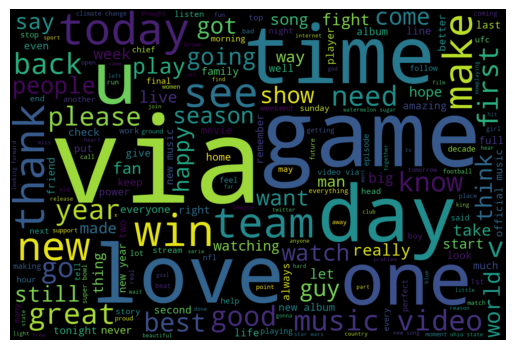

In [90]:
# Creating Word Clouds for the Province column
from wordcloud import WordCloud
#Initialize cleantext list
cleantext = []
text = ""
cleantext = df_clean['clean_text']
for i in cleantext:
    text += i + " "
text.title().strip()
# Create visualisation
wordcloud = WordCloud(width = 1500, height = 1000, margin = 10).generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.margins(x = 0, y = 0)
plt.show()

# Experiment 1: Baseline _(Train a Naive Bayes model without a pre-processing step. Apply Countvectorizer method)_

## Data Representation
We will apply Countvectorizer on the Textprocessing() function that does not include a pre-processor step before the dataset will be fed to the model 

In [29]:
# CountVectorizer
count_vect = CountVectorizer(analyzer=Textprocessing)
print("Implementing Countvectorizer...")
start_time = time.time()
X_count = count_vect.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_count_feat = pd.DataFrame(X_count.toarray())
print("Time taken for implementing countvectorizer without pre-processing step: ", round(process_time,3))
X_count_feat.head()

Implementing Countvectorizer...
Time taken for implementing countvectorizer without pre-processing step:  1.275


,0,1,2,3,4,5,6,7,8,9,...,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning
Implement Naive Bayes model with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations.

In [30]:
from sklearn.naive_bayes import MultinomialNB
#  Initialize Naive Bayes classifier
nb = MultinomialNB()
   
# Define hyperparameters for the Naive Bayes Classifier
param_nb = {'alpha': [0.5, 1, 1.5]}

# Initialize StratifiedKFold object with the number of folds and the random seed
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)


In [31]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_nb_count = GridSearchCV(nb, param_nb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the  Countvectorized dataset features and the label column
start_time = time.time()
print("Experiment 1: Training Naive Bayes Model...")
gs_fit_nb_count = gs_nb_count.fit(X_count_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Naive bayes 'Countvectorized-model' without pre-processing step: ", round(process_time,3))

Experiment 1: Training Naive Bayes Model...
Time taken for training Naive bayes 'Countvectorized-model' without pre-processing step:  309.423


In [32]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_nb_count.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,106.702292,75.527323,5.493311,3.233241,0.5,{'alpha': 0.5},0.777933,0.779330,0.783419,0.780227,0.002328,1
1,159.992141,38.466126,1.755315,0.463489,1,{'alpha': 1},0.756518,0.757914,0.762459,0.758964,0.002537,2
2,44.996327,6.763919,1.031799,0.061476,1.5,{'alpha': 1.5},0.734637,0.737430,0.749884,0.740650,0.006628,3


**Model Result Interpretation:** The best model has a mean_test_score of 0.780227. This is okay for a multi-class text classifier. The best parameter was gotten from alpha of 0.5. The next experiment will be to try TFIDFvectorizer to see if there will be an improvement.

# Experiment 2: _(Train a Naive Bayes model without a pre-processing step. Apply TF-IDFvectorizer method)_

## Data Representation
We will apply TF-IDFvectorizer on the Textprocessing() function that does not include a pre-processor step before the dataset will be fed to the model 

In [37]:
# TF-IDFvectorizer
tfidf_vect = TfidfVectorizer(analyzer=Textprocessing)
print("Implementing TfidfVectorizer...")
start_time = time.time()
X_tfidf = tfidf_vect.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_tfidf_feat = pd.DataFrame(X_tfidf.toarray())
print("Time taken for implementing TfidfVectorizer without pre-processing step: ", round(process_time,3))
X_tfidf_feat.head()

Implementing TfidfVectorizer...
Time taken for implementing TfidfVectorizer without pre-processing step:  1.315


,0,1,2,3,4,5,6,7,8,9,...,20263,20264,20265,20266,20267,20268,20269,20270,20271,20272
0,0.000000,0.355009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.070703,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.083037,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.054463,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


It is important to note that TfidfVectorizer processing time is slightly higher than that of CountVectorizer. This is mainly due to the fact that CountVectorizer simply counts the frequency of each word, which is a relatively simple operation. In contrast, TF-IDFVectorizer needs to compute the IDF (inverse document frequency) score for each word, which involves calculating the logarithm of the ratio of the total number of documents to the number of documents containing the word. 

## Machine Learning
Implement Naive Bayes model with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 1 as inputs to the GridSearchCV pipeline.

In [36]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_nb_tfidf = GridSearchCV(nb, param_nb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the TF-IDF vectorized dataset features and the label column
start_time = time.time()
print("Experiment 2: Training Naive Bayes Model...")
gs_fit_nb_tfidf = gs_nb_tfidf.fit(X_tfidf_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Naive Bayes 'TF-IDFVectorized-model' without pre-processing: ", round(process_time,3))

Experiment 2: Training Naive Bayes Model...
Time taken for training Naive Bayes 'TF-IDFVectorized-model' without pre-processing:  90.166


In [37]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_nb_tfidf.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,36.157805,12.636602,1.276783,0.763526,0.5,{'alpha': 0.5},0.703445,0.702048,0.708430,0.704641,0.002739,1
1,30.555779,14.976007,1.293933,0.261972,1,{'alpha': 1},0.695065,0.692737,0.694923,0.694242,0.001065,2
2,9.538097,1.346537,0.885581,0.021254,1.5,{'alpha': 1.5},0.693203,0.689479,0.690731,0.691138,0.001547,3


**Model Result Interpretation:** The mean_test_score for the most effective model metric is 0.704641 with an 'alpha' parameter of 0.5 like in the previous experiment. The result is low, so the model did not improve. Therefore, the previous experiment will be selected over this one.
- **Having picked the Naive Bayes model with CountVectorizer implemented, we will explore a pre-proposing step to see if it improves.**

# Experiment 3: _(Train a Naive Bayes model with Porter Stemmer pre-processing step. Apply CountVectorizer method)_

## Data Representation
We will apply Countvectorizer on the Textprocessing_stem() function that includes Porter Stemmer pre-processor step before the dataset will be fed to the model 

In [49]:
# CountVectorizer with stemmig pre-processor method
count_vect_stem = CountVectorizer(analyzer=Textprocessing_stem)
print("Implementing Countvectorizer...")
start_time = time.time()
X_count_stem = count_vect_stem.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_count_stem_feat = pd.DataFrame(X_count_stem.toarray())
print("Time taken for implementing countvectorizer with stemming step: ", round(process_time,3))
X_count_stem_feat.head()

Implementing Countvectorizer...
Time taken for implementing countvectorizer with stemming step:  4.651


,0,1,2,3,4,5,6,7,8,9,...,16605,16606,16607,16608,16609,16610,16611,16612,16613,16614
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning
Implement Naive Bayes model with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 1 as inputs to the GridSearchCV pipeline.

In [39]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_nb_count_stem = GridSearchCV(nb, param_nb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the Countvectorized dataset features and the label column
start_time = time.time()
print("Experiment 3: Training Naive Bayes Model...")
gs_fit_nb_count_stem = gs_nb_count_stem.fit(X_count_stem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Naive bayes 'Countvectorized-model' with stemming step: ", round(process_time,3))

Experiment 3: Training Naive Bayes Model...
Time taken for training Naive bayes 'Countvectorized-model' with stemming step:  148.853


In [40]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_nb_count_stem.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,44.256426,0.724747,1.664798,0.366911,0.5,{'alpha': 0.5},0.777002,0.783520,0.775035,0.778519,0.003626,1
1,43.137445,2.189336,1.515618,0.243637,1,{'alpha': 1},0.751862,0.759311,0.765720,0.758964,0.005663,2
2,33.018380,12.047776,1.059029,0.495106,1.5,{'alpha': 1.5},0.734171,0.736034,0.753610,0.741272,0.008757,3


**Model Result interpretation:** The mean_test_score for the most effective model metric is 0.778519 with an 'alpha' parameter of 0.5 like in the previous two experiments. Despite an improvement in experiment 2, the results are slightly lower than experiment 1. Therefore, we will now apply a lemmatizer as a pre-processing step to see if the score improves.

# Experiment 4: _(Train a Naive Bayes model with WordNet lemmatizer  pre-processing step. Apply CountVectorizer method)_

## Data Representation
We will apply Countvectorizer on the Textprocessing_lem() function that includes WordNet lemmatizer pre-processor step before the dataset will be fed to the model 

In [43]:
# CountVectorizer with lemmatizer pre-processor method
count_vect_lem = CountVectorizer(analyzer=Textprocessing_lem)
print("Implementing Countvectorizer...")
start_time = time.time()
X_count_lem = count_vect_lem.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_count_lem_feat = pd.DataFrame(X_count_lem.toarray())
print("Time taken for implementing countvectorizer with lemmatization step: ", round(process_time,3))
X_count_lem_feat.head()

Implementing Countvectorizer...
Time taken for implementing countvectorizer with lemmatization step:  5.976


,0,1,2,3,4,5,6,7,8,9,...,18843,18844,18845,18846,18847,18848,18849,18850,18851,18852
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning
Implement Naive Bayes model with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 1 as inputs to the GridSearchCV pipeline.

In [42]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_nb_count_lem = GridSearchCV(nb, param_nb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the Countvectorized dataset features and the label column
start_time = time.time()
print("Experiment 4: Training Naive Bayes Model...")
gs_fit_nb_count_lem = gs_nb_count_lem.fit(X_count_lem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Naive bayes 'Countvectorized-model' with lemmatizer step: ", round(process_time,3))

Experiment 4: Training Naive Bayes Model...
Time taken for training Naive bayes 'Countvectorized-model' with lemmatizer step:  177.769


In [43]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_nb_count_lem.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,46.224918,1.660022,1.530444,0.263267,0.5,{'alpha': 0.5},0.777467,0.778399,0.779227,0.778364,0.000719,1
1,63.915466,11.197693,1.125866,0.063234,1,{'alpha': 1},0.753259,0.759311,0.758733,0.757101,0.002727,2
2,52.640005,24.190121,0.991288,0.325298,1.5,{'alpha': 1.5},0.733706,0.740689,0.752678,0.742358,0.007835,3


**Model Result interpretation:** The mean_test_score for the most effective model metric is 0.778364 with an 'alpha' parameter of 0.5 like in the previous three experiments. The result is similar to the result of experiment 3 and still lower than experiment 1. At this point, we will try out a different model to see the difference between them.
- Generally, after training the 4 Naive Bayes models, it was observed that the time used for training the lemmatized model was higher than that gotten from experiment 2 and 3. This is mainly due to the computational complexity involved in analyzing the morphological structure of a word and its context. This is done to determine its base form or lemma.
- Overall, Experiment 1 (Naive Bayes model and Countvectorizer method without a pre-processing step) used the highest time among the four experiments performed. 

# Experiment 5: _(Train a MLP Classifier model without a pre-processing step. Apply CountVectorizer method)_

## Data Representation
We will use same vectorization (CountVectorizer) settings defined in Experiment 1 that generated the vectorized dataset; X_count_feat.

In [33]:
# Import MLP Claasifier from sklearn.neural_network
from sklearn.neural_network import MLPClassifier

#  Initialize the MLP classifier
mlp = MLPClassifier()

# Define hyperparameters for the MLP Classifier
param_mlp = {'hidden_layer_sizes': [(100,), (50, 50), (200, 200)],
             'alpha': [0.01, 0.1]
             }

# Initialize StratifiedKFold object with the number of folds and the random seed
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)


## Machine Learning
Implement MLP Classifier with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations.

In [34]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_mlp_count = GridSearchCV(mlp, param_mlp, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the Countvectorized dataset features and the label column
start_time = time.time()
print("Experiment 5: Training MLP Classifier Model...")
gs_fit_mlp_count = gs_mlp_count.fit(X_count_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training MLP Classifier 'Countvectorized-model' without pre-processing step: ", round(process_time,3))

Experiment 5: Training MLP Classifier Model...
Time taken for training MLP Classifier 'Countvectorized-model' without pre-processing step:  8147.083


In [35]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_mlp_count.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,668.227200,13.188282,4.125236,0.987031,0.01,"(50, 50)","{'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}",0.772346,0.782123,0.776432,0.776967,0.004009,1
2,2467.690453,45.164097,12.188930,4.056028,0.01,"(200, 200)","{'alpha': 0.01, 'hidden_layer_sizes': (200, 200)}",0.772346,0.781657,0.773638,0.775880,0.004119,2
0,1986.451425,45.578542,7.640061,1.921449,0.01,"(100,)","{'alpha': 0.01, 'hidden_layer_sizes': (100,)}",0.769088,0.781192,0.769446,0.773242,0.005623,3
3,2287.493141,40.607646,6.619086,2.140349,0.1,"(100,)","{'alpha': 0.1, 'hidden_layer_sizes': (100,)}",0.763501,0.776536,0.774103,0.771380,0.005659,4
4,1213.337688,102.844669,3.834768,0.966189,0.1,"(50, 50)","{'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}",0.755121,0.766294,0.752678,0.758031,0.005927,5


**Model Result interpretation:** Just like the previous last two experiments, The performance of the model failed to surpass the result gotten from experiment 1. The most effective metric result from this model training is 0.776967 with an 'alpha' parameter of 0.01 and 'hidden_layer_sizes' of (50, 50). We will apply TF-IDFvectorizer method instead of Countvectorizer next time.

# Experiment 6: _(Train a MLP Classifier model without a pre-processing step. Apply TF-IDFvectorizer method)_

## Data Representation
We will use same vectorization settings (TF-IDFvectorizer method) defined in Experiment 2 that generated the vectorized dataset; X_tfidf_feat.

## Machine Learning
Implement MLP Classifier with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 5 as inputs to the GridSearchCV pipeline.

In [38]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_mlp_tfidf = GridSearchCV(mlp, param_mlp, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the TF-IDF dataset features and the label column
start_time = time.time()
print("Experiment 6: Training MLP Classifier Model...")
gs_fit_mlp_tfidf = gs_mlp_tfidf.fit(X_tfidf_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training MLP Classifier 'TF-IDFVectorized-model' without pre-processing step: ", round(process_time,3))

Experiment 6: Training MLP Classifier Model...
Time taken for training MLP Classifier 'TF-IDFVectorized-model' without pre-processing step:  14619.726


In [39]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_mlp_tfidf.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,3143.684017,251.831122,9.415549,1.638896,0.01,"(200, 200)","{'alpha': 0.01, 'hidden_layer_sizes': (200, 200)}",0.771415,0.784916,0.783419,0.779917,0.006042,1
0,3595.524508,181.367672,7.733938,1.382582,0.01,"(100,)","{'alpha': 0.01, 'hidden_layer_sizes': (100,)}",0.771881,0.781657,0.781556,0.778365,0.004585,2
3,3215.473788,239.635715,5.070397,0.723519,0.1,"(100,)","{'alpha': 0.1, 'hidden_layer_sizes': (100,)}",0.771881,0.780261,0.777364,0.776502,0.003475,3
1,1202.954960,17.949203,4.399208,1.984829,0.01,"(50, 50)","{'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}",0.772346,0.781192,0.772706,0.775415,0.004088,4
4,2048.524059,260.950012,2.833990,0.283009,0.1,"(50, 50)","{'alpha': 0.1, 'hidden_layer_sizes': (50, 50)}",0.774674,0.770484,0.776432,0.773864,0.002495,5


**Model Result interpretation:** Comparing the model to the other experiments (2 to 5) shows a slight improvement. However, the mean_test_score of 0.779917 is still slightly below the experiment 1 result which still remains the highest so far. The parameters of the optimum model result in experiment 6 were 'alpha' - 0.01 and 'hidden_layer_sizes' of (200, 200). At this point, we will implement a pre-processing step and continue with the TF-IDF vectorizer.

# Experiment 7: _(Train a MLP Classifier model with Porter Stemmer pre-processing step. Apply TF-IDFvectorizer method)_

## Data Representation
We will apply TF-IDFvectorizer on the Textprocessing_stem() function that includes Porter Stemmer pre-processor step before the dataset will be fed to the model 

In [40]:
# TF-IDFvectorizer with stemmig pre-processor method
tfidf_vect_stem = TfidfVectorizer(analyzer=Textprocessing_stem)
print("Implementing TfidfVectorizer...")
start_time = time.time()
X_tfidf_stem = tfidf_vect_stem.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_tfidf_stem_feat = pd.DataFrame(X_tfidf_stem.toarray())
print("Time taken for implementing TfidfVectorizer with stemming step: ", round(process_time,3))
X_tfidf_stem_feat.head()

Implementing TfidfVectorizer...
Time taken for implementing TfidfVectorizer with stemming step:  6.064


,0,1,2,3,4,5,6,7,8,9,...,16605,16606,16607,16608,16609,16610,16611,16612,16613,16614
0,0.000000,0.363048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.073309,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.086235,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.055174,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning
Implement MLP classifier with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 5 as inputs to the GridSearchCV pipeline.

In [41]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_mlp_tfidf_stem = GridSearchCV(mlp, param_mlp, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the TF-IDF dataset features and the label column
start_time = time.time()
print("Experiment 7: Training MLP Classifier Model...")
gs_fit_mlp_tfidf_stem = gs_mlp_tfidf_stem.fit(X_tfidf_stem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training MLP Classifier 'TF-IDFVectorized-model' with stemming step: ", round(process_time,3))

Experiment 7: Training MLP Classifier Model...
Time taken for training MLP Classifier 'TF-IDFVectorized-model' with stemming step:  11872.056


In [42]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_mlp_tfidf_stem.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,2588.349886,200.039124,2.929392,0.065634,0.1,"(100,)","{'alpha': 0.1, 'hidden_layer_sizes': (100,)}",0.782588,0.784451,0.781090,0.782710,0.001375,1
0,2825.384173,75.681016,4.452771,1.275652,0.01,"(100,)","{'alpha': 0.01, 'hidden_layer_sizes': (100,)}",0.781192,0.782588,0.782021,0.781934,0.000574,2
2,2733.000862,141.981337,5.661203,0.172912,0.01,"(200, 200)","{'alpha': 0.01, 'hidden_layer_sizes': (200, 200)}",0.777467,0.782123,0.780624,0.780071,0.001940,3
1,998.439033,41.426281,2.123496,0.185868,0.01,"(50, 50)","{'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}",0.777002,0.777933,0.777830,0.777588,0.000417,4
5,2528.785822,74.108801,3.206791,1.053324,0.1,"(200, 200)","{'alpha': 0.1, 'hidden_layer_sizes': (200, 200)}",0.770019,0.780261,0.777830,0.776036,0.004369,5


**Model Result interpretation:** In this experiment, the mean_test_score for the most effective model metric is 0.782710 with an 'alpha' parameter of 0.1 and 'hidden_layer_sizes' of 100. The score is better than the previous highest score of 0.780227 from experiment 1. Therefore the highest score so far is from experiment 7. Let us try another pre-processing method; lemmatization using the same model.

# Experiment 8: _(Train a MLP Classifier model with WordNet lemmatizer pre-processing step. Apply TF-IDFvectorizer method)_

## Data Representation
We will apply TF-IDFVectorizer on the Textprocessing_lem() function that includes WordNet lemmatizer pre-processor step before the dataset will be fed to the model 

In [44]:
# TF-IDFvectorizer with WordNet lemmatizer method
tfidf_vect_lem = TfidfVectorizer(analyzer=Textprocessing_lem)
print("Implementing TfidfVectorizer...")
start_time = time.time()
X_tfidf_lem = tfidf_vect_lem.fit_transform(df_tweets['text'])
process_time = time.time() - start_time
X_tfidf_lem_feat = pd.DataFrame(X_tfidf_lem.toarray())
print("Time taken for implementing TfidfVectorizer with lemmatization step: ", round(process_time,3))
X_tfidf_lem_feat.head()

Implementing TfidfVectorizer...
Time taken for implementing TfidfVectorizer with lemmatization step:  2.158


,0,1,2,3,4,5,6,7,8,9,...,18843,18844,18845,18846,18847,18848,18849,18850,18851,18852
0,0.000000,0.361935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.071467,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.084375,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.054936,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine Learning
Implement MLP classifier with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 5 as inputs to the GridSearchCV pipeline.

In [45]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_mlp_tfidf_lem = GridSearchCV(mlp, param_mlp, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the TF-IDF dataset features and the label column
start_time = time.time()
print("Experiment 8: Training MLP Classifier Model...")
gs_fit_mlp_tfidf_lem = gs_mlp_tfidf_lem.fit(X_tfidf_lem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training MLP Classifier 'TF-IDFVectorized-model' with lemmatization step: ", round(process_time,3))

Experiment 8: Training MLP Classifier Model...
Time taken for training MLP Classifier 'TF-IDFVectorized-model' with lemmatization step:  15251.547


In [46]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_mlp_tfidf_lem.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4112.040252,63.514523,5.050408,0.814533,0.01,"(100,)","{'alpha': 0.01, 'hidden_layer_sizes': (100,)}",0.778399,0.786778,0.783419,0.782865,0.003443,1
2,2953.146933,151.689651,7.039785,0.774011,0.01,"(200, 200)","{'alpha': 0.01, 'hidden_layer_sizes': (200, 200)}",0.777467,0.785382,0.781556,0.781468,0.003232,2
3,3130.784913,107.493285,4.662298,0.881780,0.1,"(100,)","{'alpha': 0.1, 'hidden_layer_sizes': (100,)}",0.774674,0.783520,0.782953,0.780382,0.004043,3
1,1419.170370,387.419199,3.158751,0.500791,0.01,"(50, 50)","{'alpha': 0.01, 'hidden_layer_sizes': (50, 50)}",0.773277,0.788641,0.772706,0.778208,0.007381,4
5,2883.516495,161.536346,4.744044,1.098461,0.1,"(200, 200)","{'alpha': 0.1, 'hidden_layer_sizes': (200, 200)}",0.770950,0.777002,0.780158,0.776037,0.003821,5


**Model Result interpretation:** The score here is slightly higher than the previous score from experiment 7. The mean_test_score for the most effective model metric for this experiment is 0.782865 while the previous one was 0.782710 which is almost the same. It had an 'alpha' parameter of 0.01 and 'hidden_layer_sizes' of 100. At this point (new high score), we will introduce a new model next.

# Experiment 9: _(Train a Gradient Boosting model with Porter Stemmer pre-processing step. Apply CountVectorizer method)_

## Data Representation
We will use same vectorization settings defined in Experiment 3 that generated the vectorized dataset; X_count_stem_feat.

## Machine Learning
Implement Gradient Boosting model with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()
   
# Define hyperparameters for the Gradient Boosting Classifier
param_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1]
}

# Initialize StratifiedKFold object with the number of folds and the random seed
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=10)

In [51]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_gb_count_stem = GridSearchCV(gb, param_gb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the Countvectorized dataset features and the label column
start_time = time.time()
print("Experiment 9: Training Gradient Boosting Model...")
gs_fit_gb_count_stem = gs_gb_count_stem.fit(X_count_stem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Gradient Boosting 'Countvectorized-model' with stemming pre-processing step: ", round(process_time,3))

Experiment 10: Training Gradient Boosting Model...
Time taken for training Gradient Boosting 'Countvectorized-model' without pre-processing step:  47741.78


In [52]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_gb_count_stem.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,18963.172396,4278.086362,1.355497,0.787928,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.739292,0.724395,0.751281,0.738323,0.010998,1
0,15134.285377,104.105961,1.515097,0.069371,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.722998,0.709032,0.728924,0.720318,0.008339,2


**Model Result interpretation:** The score is less than the previous score gotten from experiment 8 that has the highest score so far. In this experiment, the mean_test_score for the most effective model metric is 0.738323. Both training processes used learning rate of 0.1 (known to give better outcomes). However, the n_estimators of 200 was more effective to that of 100. We will implement TF-IDF vectorizer with stemming using same parameters as experiment 9 to see how it will perform.

# Experiment 10: _(Train a Gradient Boosting model with Porter Stemmer pre-processing step. Apply TFIDFVectorizer method)_

## Data Representation
We will use same vectorization settings defined in Experiment 8 that generated the vectorized dataset; X_tfidf_stem_feat.

## Machine Learning
Implement Gradient Boosting with K-Fold (n_splits = 3) splitting method and GridSearchCV pipeline for evaluating different parameter combinations. We will use same parameters defined in Experiment 9 as inputs to the GridSearchCV pipeline.

In [53]:
# Initialize GridsearchCV object with the classifier name, the hyperparameters, and the cross-validation object
gs_gb_tfidf_stem = GridSearchCV(gb, param_gb, cv=kfold, n_jobs=-1)

# Fitting the GridSearchCV object with the TF-IDF dataset features and the label column
start_time = time.time()
print("Experiment 10: Training Gradient Boosting Model...")
gs_fit_gb_tfidf_stem = gs_gb_tfidf_stem.fit(X_tfidf_stem_feat, df_tweets['label'])
process_time = time.time() - start_time
print("Time taken for training Gradient Boosting 'TF-IDFVectorized-model' with stemming pre-processing step: ", round(process_time,3))

Experiment 10: Training Gradient Boosting Model...
Time taken for training Gradient Boosting 'TF-IDFVectorized-model' with stemming pre-processing step:  48279.503


In [54]:
### Print out all the folds across all the parameter settings using cv_results method ###

# Extract the top 3 models using the mean values of the selection
pd.DataFrame(gs_fit_gb_tfidf_stem.cv_results_).sort_values('mean_test_score', ascending=False)[0:3]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,19441.226512,4329.505097,4.363959,5.009505,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.729981,0.723929,0.735911,0.72994,0.004891,1
0,15156.651926,131.416121,3.974297,3.111095,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",0.719739,0.695531,0.726129,0.71380,0.013179,2


**Model Result interpretation:** The score is less than the previous score gotten from experiment 9 which is also less than the highest score gotten from experiment 8. In this experiment, the mean_test_score for the most effective model metric is 0.72994. Also, n_estimators of 200 gave better outcome than 100. At this point, we will choose Experiment 8 (Train a MLP Classifier model with WordNet lemmatizer pre-processing step. Apply TF-IDFvectorizer method)results that gave us the best mean_test_score for the final metrics evaluation and anlysis.

# Final Metrics Evaluation Experiment
## Here we will conduct the final metrics evaluation for the model trained in experiment 8
- Metrics such as Accuracy, Precision Recall and F1 scores will be evaluated. Also, Confusion matrix and Classification report will be presented.
- The settings and parameters from the selected model are: Settings: MLP Classifier model with WordNet lemmatizer pre-processing step and TF-IDFvectorizer method. Parameters: 'alpha': 0.01, 'hidden_layer_sizes': (100,)

## Data Representation
We will use the same TF-IDFVectorizer pre-processor applied in experiment 8 but this time, instead of using K-Fold splitting method, we will employ Train-Test split method to split the dataset.

### Split Dataset into Train (80%) and test (20%) sets

In [82]:
# Extract the label column from the dataset
y = df['label']

# Extract the text column from the dataset
X = df['text']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Print the shapes of train and test sets after splitting
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Train set shape: (5154,)
Test set shape: (1289,)


## Machine Learning
Since we will be running just one model, we will import pipeline from sklearn to help in running through the stages of all the processes. We will use same parameters defined in Experiment 8 as inputs to the pipeline.

In [83]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([    
    ('features', TfidfVectorizer(analyzer=Textprocessing_lem)),  
    ('classifier', MLPClassifier(hidden_layer_sizes=(100,), alpha = 0.01))
    #('classifier', MLPClassifier(hidden_layer_sizes=(100,100), alpha = 0.01))    
])


In [84]:
# Fit the pipeline
start_time = time.time()
print("Training started...")
pipeline.fit(X_train, y_train)
print("Training completed")
pipeline_train_time = time.time() - start_time
print("Pipeline Training Time: ", pipeline_train_time)

Training started...
Training completed
Pipeline Training Time:  671.3264861106873


# Metrics Evaluation

In [85]:
# Predicting with the test data
y_pred = pipeline.predict(X_test)

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Compute the evaluation metrics for the pipeline
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics for the pipeline
print('MLP Classifier Evaluation Metrics:')
print('Accuracy:', acc)
print('Precision:', prec)
print('Recall:', rec)
print('F1 Score:', f1)
print('Confusion Matrix:\n', cm)

# Print the Classification Report for the pipeline
print('Classification Report:\n', classification_report(y_test, y_pred))

MLP Classifier Evaluation Metrics:
Accuracy: 0.7897595034910784
Precision: 0.7348088005767744
Recall: 0.5736958833059272
F1 Score: 0.6163157497495246
Confusion Matrix:
 [[  5   2   8  15   4   0]
 [  0  27  14   6   7   2]
 [  1   1 460  24  37   4]
 [  0   0  42 104  21   3]
 [  1   3  31   8 395   1]
 [  1   1  12  12  10  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.15      0.24        34
           1       0.79      0.48      0.60        56
           2       0.81      0.87      0.84       527
           3       0.62      0.61      0.61       170
           4       0.83      0.90      0.87       439
           5       0.73      0.43      0.54        63

    accuracy                           0.79      1289
   macro avg       0.73      0.57      0.62      1289
weighted avg       0.78      0.79      0.78      1289



## Final Evaluation Metrics for Multi-class Classification of tweets problem
- The evaluation metrics show that the MLP Classifier has an overall accuracy of 0.789, which means that it correctly classified 79% of the tweets in the test dataset. However, it is also important to consider precision and recall scores for each class to understand the model's performance in detail.
- The precision score of the model ranges from 0.62 to 0.83, with the highest precision score achieved for the "Sports & Gaming" category. This means that the model correctly identified 83% of the tweets that belonged to the "Sports & Gaming" category out of all tweets that the model predicted to belong to that category.
- The recall score of the model ranges from 0.15 to 0.90, with the highest recall score achieved for the "Sports & Gaming" category. This means that the model correctly identified 90% of all the tweets that actually belonged to the "Sports & Gaming" category
- The confusion matrix shows that the model has a relatively high number of false negatives for some classes, particularly for "Arts & Culture," "Business & Entrepreneurs," and "Daily Life." This indicates that the model has difficulty correctly classifying tweets belonging to these categories. 